<a href="https://colab.research.google.com/github/ofs416/UNI/blob/main/FTR_3F8_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the auxiliary code for the 3F8 coursework. Some parts are missing and should be completed by the student. These are Marked with XXX

**Note that your changes will not be saved unless you click the "Copy to Drive" button above!**

In [5]:
# First we download the data

#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY' -O X.txt
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15HONyJXWARLhNAtNQXFWAH8pvGPahh_U' -O y.txt

--2023-03-25 15:50:22--  https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY
Resolving docs.google.com (docs.google.com)... 142.251.163.100, 142.251.163.102, 142.251.163.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l2ae1q1mu0b2dedbcduqldle5i6nralh/1679759400000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download&uuid=cbf11111-b9b0-4f6e-b2b3-bcb51617e231 [following]
--2023-03-25 15:50:22--  https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l2ae1q1mu0b2dedbcduqldle5i6nralh/1679759400000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download&uuid=cbf11111-b9b0-4f6e-b2b3-bcb51617e231
Resolving doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.googleusercontent.com)... 172.253.63.132, 2607:f

In [6]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')
if False:
  X = np.repeat(np.array([[3,3]]),15, axis=0) + np.random.rand(15,2)
  X = np.concatenate((X, np.repeat(np.array([[-3,-3]]),15, axis=0) + np.random.rand(15,2)))
  y = np.concatenate((np.ones(15),np.zeros(15)))

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [7]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [8]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

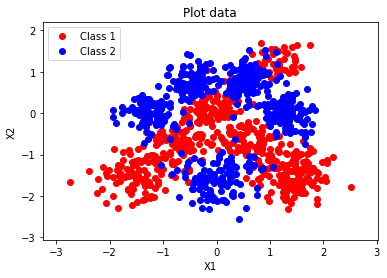

In [9]:
plot_data(X, y)

In [10]:
def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

In [11]:
def logistic(x): return 1.0 / (1.0 + np.exp(-x))

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

def log_likelihood(X_tilde, y, w):
  output_prob = predict(X_tilde, w)
  return np.sum(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

def mean_log_likelihood(X_tilde, y, w):
  output_prob = predict(X_tilde, w)
  return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


import scipy

def laplace_approx(X_tilde, y, sigma2):
  M = X_tilde.shape[1]
  N = X_tilde.shape[0]

  # First Define function to minimise and gradient
  def minus_log_postierior(X_tilde, y, w, sigma2):
    return -log_likelihood(X_tilde, y, w) + 1/(2 * sigma2) * np.matmul(w.T, w)
  
  def grad_minus_log_postierior(X_tilde, y, w, sigma2):
    sigmoid_value = predict(X_tilde, w)
    dL_dw = np.matmul((y - sigmoid_value).T, X_tilde)
    return -dL_dw + 1/(sigma2) * w

  # Minimise to find w_map
  w0 = np.random.randn(M)
  w_map, f, d = scipy.optimize.fmin_l_bfgs_b(func=lambda w: minus_log_postierior(X_tilde, y, w, sigma2), x0=w0, fprime=lambda w: grad_minus_log_postierior(X_tilde, y, w, sigma2))

  # Calculate Hessian
  sigmoid_value = predict(X_tilde, w_map)
  S = np.diag(sigmoid_value*(1-sigmoid_value))
  H = X_tilde.T @ S @ X_tilde + np.diag(1/sigma2 * np.ones(M))

  # Calculate model evidence
  log_Z = log_likelihood(X_tilde, y, w_map) - 0.5*np.log(sigma2) - 1/(2 * sigma2) * np.matmul(w_map.T, w_map) - 0.5 * np.linalg.slogdet(H)[1]
  log_Z_approx = log_likelihood(X_tilde, y, w_map) - 0.5*M*np.log(N)
  return w_map, H, log_Z

def predict_map(X_tilde, w_map): return predict(X_tilde, w_map)

def predict_laplace(X_tilde, w_map, H):
  H_inv = np.linalg.inv(H)
  p = []
  for x in X_tilde:
    p.append(scipy.stats.norm.cdf(w_map.T @ x / np.sqrt(1 + x.T @ H_inv @ x)))

  return np.array(p)

In [12]:
sigma2 = 1

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)

w_map, H, log_Z = laplace_approx(X_tilde_train, y_train, sigma2)

print(log_Z)

-506.8251019018478


In [13]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, predictor, map_inputs = lambda x : x, title='Plot data'):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predictor(X_tilde)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title(title)
    plt.show()

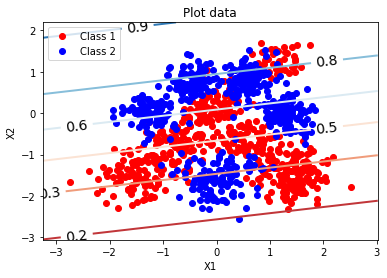

In [14]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, lambda X_tilde: predict_map(X_tilde, w_map))

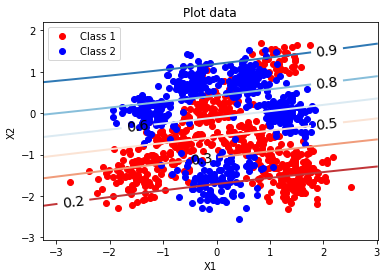

In [15]:
plot_predictive_distribution(X, y, lambda X_tilde: predict_laplace(X_tilde, w_map, H))

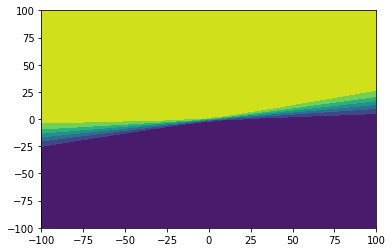

In [16]:
xlist = np.linspace(-100.0, 100.0, 100)
ylist = np.linspace(-100.0, 100.0, 100)
X1, X2 = np.meshgrid(xlist, ylist)
Z = np.zeros(X1.shape)
X_tilde_1=[]
for i in range(100):
  for j in range(100):
    X_tilde_1.append(np.array([1., X1[i,j], X2[i,j]]))
X_tilde_1 = np.array(X_tilde_1)
Z = predict_laplace(X_tilde_1, w_map, H)
Z = Z.reshape(100,100)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X1, X2, Z)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [18]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [19]:
# We expand the data

l = 0.1
sigma2=1

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

w_map, H , log_Z = laplace_approx(X_tilde_train, y_train, sigma2)
print(log_Z)

-311.8035406365718


In [20]:
def calculate_ll(X_tilde, y, pr):
  output_prob = pr(X_tilde)
  return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

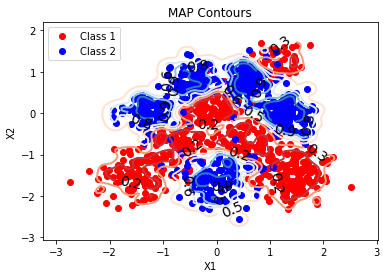

-0.2108126400528233
-0.34094959268729935


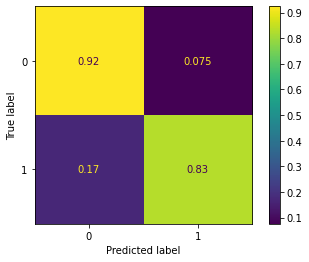

In [21]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, lambda X_tilde: predict_map(X_tilde, w_map), lambda x : evaluate_basis_functions(l, x, X_train), title='MAP Contours')

print(calculate_ll(X_tilde_train, y_train, lambda X_tilde: predict_map(X_tilde, w_map)))
print(calculate_ll(X_tilde_test, y_test, lambda X_tilde: predict_map(X_tilde, w_map)))

predictions = predict_map(X_tilde_test, w_map).round()
cm = confusion_matrix(y_test, predictions, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

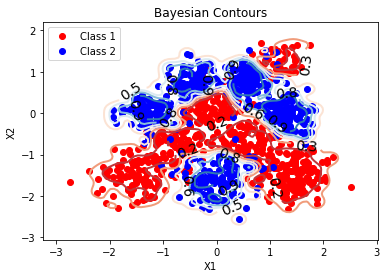

-0.1918820614947542
-0.3171457343662911


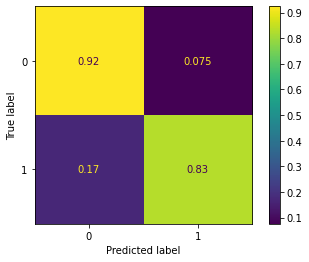

In [22]:
plot_predictive_distribution(X, y, lambda X_tilde: predict_laplace(X_tilde, w_map, H), lambda x : evaluate_basis_functions(l, x, X_train), title='Bayesian Contours')

print(calculate_ll(X_tilde_train, y_train, lambda X_tilde: predict_laplace(X_tilde, w_map, H)))
print(calculate_ll(X_tilde_test, y_test, lambda X_tilde: predict_laplace(X_tilde, w_map, H)))

predictions = predict_laplace(X_tilde_test, w_map, H).round()
cm = confusion_matrix(y_test, predictions, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-11-14382d5df676>:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))
<ipython-input-11-14382d5df676>:7: RuntimeWarning: invalid value encountered in multiply
  return np.sum(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


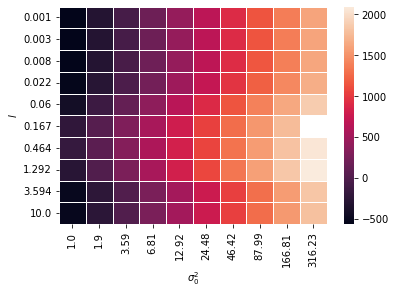

In [23]:
from tqdm.notebook import tqdm

sigma2s = 10**np.linspace(0,2.5,10)
ls = 10**np.linspace(-3, 1, 10)

model_evidence = []

for l in tqdm(ls):
  for sigma2 in sigma2s:
    X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
    X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

    w_map, H , log_Z = laplace_approx(X_tilde_train, y_train, sigma2)
    model_evidence.append(log_Z)

model_evidence = np.array(model_evidence).reshape(10,10)

import seaborn as sns

ax = sns.heatmap(model_evidence, linewidth=0.5, xticklabels=sigma2s.round(2), yticklabels=ls.round(3))
plt.xlabel('$\sigma_0^2$')
plt.ylabel('$l$')
plt.show()

In [24]:
l = 1
sigma2=100

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

w_map, H , log_Z = laplace_approx(X_tilde_train, y_train, sigma2)
print(log_Z)

1634.4779612625578


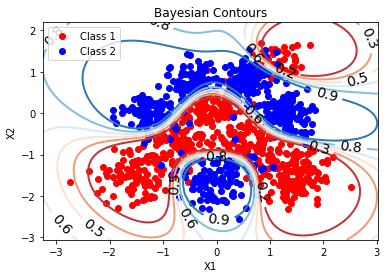

-0.20522730891226182
-0.29194085933154434


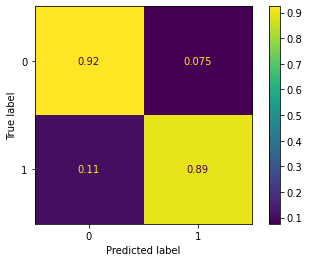

In [25]:

plot_predictive_distribution(X, y, lambda X_tilde: predict_laplace(X_tilde, w_map, H), lambda x : evaluate_basis_functions(l, x, X_train), title='Bayesian Contours')

print(calculate_ll(X_tilde_train, y_train, lambda X_tilde: predict_laplace(X_tilde, w_map, H)))
print(calculate_ll(X_tilde_test, y_test, lambda X_tilde: predict_laplace(X_tilde, w_map, H)))

predictions = predict_laplace(X_tilde_test, w_map, H).round()
cm = confusion_matrix(y_test, predictions, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()